# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import sys
from sklearn import tree

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = sentance.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:46<00:00, 2329.82it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

In [19]:
# Updating dataframe for clean project title and remove old project title
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                         clean_essay  
0  students english learners working english seco...  
1  students arrive school eager learn polite gene...

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = sentance.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 52280.32it/s]


In [21]:
# after preprocesing
preprocessed_title[20000]

'need move input'

In [22]:
# Updating dataframe for clean project title and remove old project title
project_data['clean_project_title'] = preprocessed_title
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                         clean_essay  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                         clean_project_title  
0  educational support english learners home  
1           wanted projector hungry learners

# Preprocessing project_grade

In [23]:
# similarly you can preprocess the project_grade also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sent = sentance.lower()
    sent = decontracted(sent)
    sent = sent.replace(' ', '_')
    sent = sent.replace('-', '_')
    # https://gist.github.com/sebleier/554280
#     sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_grade.append(sent.strip())

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 131028.11it/s]


In [24]:
preprocessed_grade[:10]

['grades_prek_2',
 'grades_6_8',
 'grades_6_8',
 'grades_prek_2',
 'grades_prek_2',
 'grades_3_5',
 'grades_6_8',
 'grades_3_5',
 'grades_prek_2',
 'grades_prek_2']

In [25]:
# Updating dataframe for clean project title and remove old project title
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data['project_grade_category'] = preprocessed_grade
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                         clean_essay  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                         clean_project_title project_grade_category  
0  educational support english learners home          grades_prek_2  
1           wanted projector hungry learners             grades_6_8

In [26]:
# remove unnecessary column: https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/
project_data = project_data.drop(['Unnamed: 0','id','teacher_id','project_submitted_datetime', \
                                  'project_essay_1','project_essay_2','project_essay_3','project_essay_4', \
                                  'project_resource_summary'], axis=1)

In [27]:
project_data.head()

teacher_prefix school_state  teacher_number_of_previously_posted_projects  \
0           Mrs.           IN                                             0   
1            Mr.           FL                                             7   
2            Ms.           AZ                                             1   
3           Mrs.           KY                                             4   
4           Mrs.           TX                                             1   

   project_is_approved   price  quantity                clean_categories  \
0                    0  154.60        23               Literacy_Language   
1                    1  299.00         1    History_Civics Health_Sports   
2                    0  516.85        22                   Health_Sports   
3                    1  232.90         4  Literacy_Language Math_Science   
4                    1   67.98         4                    Math_Science   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   
2    Health_Wellness TeamSports   
3          Literacy Mathematics   
4                   Mathematics   

                                         clean_essay  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   
2  true champions not always ones win guts mia ha...   
3  work unique school filled esl english second l...   
4  second grade classroom next year made around 2...   

                               clean_project_title project_grade_category  
0        educational support english learners home          grades_prek_2  
1                 wanted projector hungry learners             grades_6_8  
2  soccer equipment awesome middle school students             grades_6_8  
3                           techie kindergarteners          grades_prek_2  
4                           interactive math tools          grades_prek_2

# Check whether each column contain NaN or Not

In [28]:
project_data['teacher_prefix'].isnull().values.any()

True

In [29]:
project_data['school_state'].isnull().values.any()

False

In [30]:
project_data['teacher_number_of_previously_posted_projects'].isnull().values.any()

False

In [31]:
project_data['project_is_approved'].isnull().values.any()

False

In [32]:
project_data['price'].isnull().values.any()

False

In [33]:
project_data['quantity'].isnull().values.any()

False

In [34]:
project_data['clean_categories'].isnull().values.any()

False

In [35]:
project_data['clean_subcategories'].isnull().values.any()

False

In [36]:
project_data['clean_essay'].isnull().values.any()

False

In [37]:
project_data['clean_project_title'].isnull().values.any()

False

In [38]:
project_data['project_grade_category'].isnull().values.any()

False

#### Since we got 'teacher prefix' attributes which contain NaN. Let check how many NaN are contain in this attributes

In [39]:
project_data['teacher_prefix'].isnull().sum().sum()

3

## 1.5 Preparing data for models

In [40]:
project_data.columns

Index(['teacher_prefix', 'school_state',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_essay', 'clean_project_title', 'project_grade_category'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:27<00:00, 3953.36it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:22<00:00, 539.44it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [0]:
price_standardized

array([[0.00098843, 0.00191166, 0.00330448, ..., 0.00153418, 0.00046704,
        0.00070265]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [41]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [41]:
# Combine the train.csv and resource.csv
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
from sklearn.model_selection import train_test_split

# https://www.geeksforgeeks.org/python-pandas-dataframe-sample/
# Take 50k dataset
project_data = project_data.sample(n=50000)
# Remove that row which contain NaN. We observed that only 3 rows that contain NaN
project_data = project_data[pd.notnull(project_data['teacher_prefix'])]
project_data.shape

(49999, 11)

In [42]:
project_data.head(2)

teacher_prefix school_state  \
53597           Mrs.           MO   
93374           Mrs.           KS   

       teacher_number_of_previously_posted_projects  project_is_approved  \
53597                                            13                    1   
93374                                             0                    1   

        price  quantity                 clean_categories  \
53597  146.20         2     Math_Science AppliedLearning   
93374  168.95         6  Health_Sports Literacy_Language   

            clean_subcategories  \
53597  Health_LifeScience Other   
93374  Health_Wellness Literacy   

                                             clean_essay  \
53597  students absolutely amazing class first grade ...   
93374  students eager learn grow every single day cur...   

                                     clean_project_title  \
53597                                 bertrand class pet   
93374  flexible seating giving students choices meet ...   

      project_grade_category  
53597          grades_prek_2  
93374             grades_3_5

In [43]:
# Split train and test
tr_X, ts_X, tr_y, ts_y, = train_test_split(project_data, project_data['project_is_approved'].values, test_size=0.33, random_state=1, stratify=project_data['project_is_approved'].values)
tr_X = tr_X.reset_index(drop=True)
ts_X = ts_X.reset_index(drop=True)

# After train data, We are going to perform KFold Cross validation at the time of training model

# Reset index of df
tr_X = tr_X.reset_index(drop=True)
ts_X = ts_X.reset_index(drop=True)
tr_X.drop(['project_is_approved'], axis=1, inplace=True)
ts_X.drop(['project_is_approved'], axis=1, inplace=True)

print('Shape of train data:', tr_X.shape)
print('Shape of test data:', ts_X.shape)

Shape of train data: (33499, 10)
Shape of test data: (16500, 10)


In [44]:
print('Shape of Train Data',[tr_X.shape, tr_y.shape])
print('Shape of Test Data',[ts_X.shape, ts_y.shape])

Shape of Train Data [(33499, 10), (33499,)]
Shape of Test Data [(16500, 10), (16500,)]


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [129]:
# # please write all the code with proper documentation, and proper titles for each subsection
# # go through documentations and blogs before you start coding 
# # first figure out what to do, and then think about how to do.
# # reading and understanding error messages will be very much helpfull in debugging your code
# # make sure you featurize train and test data separatly

# # when you plot any graph make sure you use 
#     # a. Title, that describes your plot, this will be very helpful to the reader
#     # b. Legends if needed
#     # c. X-axis label
#     # d. Y-axis label
    
# # For Numerical with train data
# ### 1) quantity

from sklearn.preprocessing import Normalizer
# # normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

quantity_scalar = Normalizer()
quantity_scalar.fit(tr_X['quantity'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
quantity_normalized = quantity_scalar.transform(tr_X['quantity'].values.reshape(1, -1))

# ### 2) price

# # the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1

price_scalar = Normalizer()
price_scalar.fit(tr_X['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
price_normalized = price_scalar.transform(tr_X['price'].values.reshape(1, -1))

# ### 3) For teacher_number_of_previously_projects

# # We are going to represent the teacher_number_of_previously_posted_projects, as numerical values within the range 0-1

teacher_number_of_previously_posted_projects_scalar = Normalizer()
teacher_number_of_previously_posted_projects_scalar.fit(tr_X['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
teacher_number_of_previously_posted_projects_normalized = teacher_number_of_previously_posted_projects_scalar.transform(tr_X['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [130]:
print('Shape of quantity:', quantity_normalized.T.shape)
print('Shape of price:', price_normalized.T.shape)
print('Shape of teacher_number_of_previously_posted_projects:', teacher_number_of_previously_posted_projects_normalized.T.shape)

Shape of quantity: (33498, 1)
Shape of price: (33498, 1)
Shape of teacher_number_of_previously_posted_projects: (33498, 1)


In [131]:
# # Transform numerical attributes for test data
ts_price = price_scalar.transform(ts_X['price'].values.reshape(1,-1))
ts_quantity = quantity_scalar.transform(ts_X['quantity'].values.reshape(1,-1))
ts_teacher_number_of_previously_posted_projects = \
teacher_number_of_previously_posted_projects_scalar.transform(ts_X['teacher_number_of_previously_posted_projects'].\
                                                              values.reshape(1,-1))

In [132]:
print('--------------Test data--------------')
print('Shape of quantity:', ts_quantity.T.shape)
print('Shape of price:', ts_price.T.shape)
print('Shape of teacher_number_of_previously_posted_projects:', ts_teacher_number_of_previously_posted_projects.T.shape)

--------------Test data--------------
Shape of quantity: (16500, 1)
Shape of price: (16500, 1)
Shape of teacher_number_of_previously_posted_projects: (16500, 1)


In [133]:
# For categorical with train data
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
# One hot encoding for school state

### 1) school_state
print('==================================================================\n')
# Count Vectorize with vocuabulary contains unique code of school state and we are doing boolen BoW
vectorizer_school_state = CountVectorizer(vocabulary=tr_X['school_state'].unique(), lowercase=False, binary=True)
vectorizer_school_state.fit(tr_X['school_state'].values)
print('List of feature in school_state',vectorizer_school_state.get_feature_names())

# Transform train data
school_state_one_hot = vectorizer_school_state.transform(tr_X['school_state'].values)
print("\nShape of school_state matrix after one hot encoding ",school_state_one_hot.shape)

### 2) project_subject_categories
print('==================================================================\n')
vectorizer_categories = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_categories.fit(tr_X['clean_categories'].values)
print('List of features in project_subject_categories',vectorizer_categories.get_feature_names())

# Transform train data
categories_one_hot = vectorizer_categories.transform(tr_X['clean_categories'].values)
print("\nShape of project_subject_categories matrix after one hot encodig ",categories_one_hot.shape)

### 3) project_subject_subcategories
print('==================================================================\n')
vectorizer_subcategories = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_subcategories.fit(tr_X['clean_subcategories'].values)
print('List of features in project_subject_categories',vectorizer_subcategories.get_feature_names())

# Transform train data
subcategories_one_hot = vectorizer_subcategories.transform(tr_X['clean_subcategories'].values)
print("\nShape of project_subject_subcategories matrix after one hot encodig ",subcategories_one_hot.shape)

### 4) project_grade_category
print('==================================================================\n')
# One hot encoding for project_grade_category

# Count Vectorize with vocuabulary contains unique code of project_grade_category and we are doing boolen BoW
vectorizer_grade_category = CountVectorizer(vocabulary=tr_X['project_grade_category'].unique(), lowercase=False, binary=True)
vectorizer_grade_category.fit(tr_X['project_grade_category'].values)
print('List of features in project_grade_category',vectorizer_grade_category.get_feature_names())

# Transform train data
project_grade_category_one_hot = vectorizer_grade_category.transform(tr_X['project_grade_category'].values)
print("\nShape of project_grade_category matrix after one hot encodig ",project_grade_category_one_hot.shape)

### 5) teacher_prefix
print('==================================================================\n')
# One hot encoding for teacher_prefix

# Count Vectorize with vocuabulary contains unique code of teacher_prefix and we are doing boolen BoW
# Since some of the data is filled with nan. So we update the nan to 'None' as a string
# tr_X['teacher_prefix'] = tr_X['teacher_prefix'].fillna('None')
vectorizer_teacher_prefix = CountVectorizer(vocabulary=tr_X['teacher_prefix'].unique(), lowercase=False, binary=True)
vectorizer_teacher_prefix.fit(tr_X['teacher_prefix'].values)
print('List of features in teacher_prefix',vectorizer_teacher_prefix.get_feature_names())

# Transform train data
teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(tr_X['teacher_prefix'].values)
print("\nShape of teacher_prefix matrix after one hot encoding ",teacher_prefix_one_hot.shape)


List of feature in school_state ['SC', 'CA', 'PA', 'IL', 'FL', 'MI', 'MO', 'OR', 'NY', 'KY', 'OH', 'NC', 'GA', 'VA', 'SD', 'IN', 'NJ', 'MD', 'CT', 'AZ', 'ME', 'TX', 'KS', 'WI', 'MT', 'TN', 'LA', 'NV', 'MA', 'HI', 'WV', 'OK', 'WA', 'CO', 'ID', 'IA', 'MS', 'UT', 'AL', 'AR', 'NH', 'DC', 'MN', 'NE', 'NM', 'DE', 'VT', 'RI', 'AK', 'WY', 'ND']

Shape of school_state matrix after one hot encoding  (33498, 51)

List of features in project_subject_categories ['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']

Shape of project_subject_categories matrix after one hot encodig  (33498, 9)

List of features in project_subject_categories ['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_

In [134]:
# Transform categorical for test data
ts_school_state = vectorizer_school_state.transform(ts_X['school_state'].values)
ts_project_subject_category = vectorizer_categories.transform(ts_X['clean_categories'].values)
ts_project_subject_subcategory = vectorizer_subcategories.transform(ts_X['clean_subcategories'].values)
ts_project_grade_category = vectorizer_grade_category.transform(ts_X['project_grade_category'].values)
ts_teacher_prefix = vectorizer_teacher_prefix.transform(ts_X['teacher_prefix'].values)

In [135]:
print('--------------Test data--------------')
print('Shape of school_state:', ts_school_state.shape)
print('Shape of project_subject_categories:', ts_project_subject_category.shape)
print('Shape of project_subject_subcategories:', ts_project_subject_subcategory.shape)
print('Shape of project_grade_category:', ts_project_grade_category.shape)
print('Shape of teacher_prefix:', ts_teacher_prefix.shape)

--------------Test data--------------
Shape of school_state: (16500, 51)
Shape of project_subject_categories: (16500, 9)
Shape of project_subject_subcategories: (16500, 30)
Shape of project_grade_category: (16500, 4)
Shape of teacher_prefix: (16500, 5)


In [136]:
list_features = ['quantity','price','teacher_number_of_previously_posted_projects'] # storing all features names for further print feature importance
for i in range(len(vectorizer_school_state.get_feature_names())):
    list_features.append(vectorizer_school_state.get_feature_names()[i])
for i in range(len(vectorizer_categories.get_feature_names())):
    list_features.append(vectorizer_categories.get_feature_names()[i])
for i in range(len(vectorizer_subcategories.get_feature_names())):
    list_features.append(vectorizer_subcategories.get_feature_names()[i])
for i in range(len(vectorizer_grade_category.get_feature_names())):
    list_features.append(vectorizer_grade_category.get_feature_names()[i])
for i in range(len(vectorizer_teacher_prefix.get_feature_names())):
    list_features.append(vectorizer_teacher_prefix.get_feature_names()[i])

len(list_features)

102

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [137]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### Note:
> We already have preprocessed both essay and project_title in Text processing section (1.3 and 1.4) above

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [256]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# BoW

In [257]:
### BoW in Essay and Title on Train

# # We are considering only the bigram words which appeared in at least 10 documents with max feature = 5000(rows or projects).
vectorizer_bow = CountVectorizer(min_df=10, max_features=5000)
tr_essay = vectorizer_bow.fit_transform(tr_X['clean_essay'].values)
print("Shape of essay matrix after one hot encodig on train",tr_essay.shape)

# # Similarly you can vectorize for title also
vectorizer_bowt = CountVectorizer(min_df=10, max_features=5000)
tr_title = vectorizer_bowt.fit_transform(tr_X['clean_project_title'].values)
print("Shape of title matrix after one hot encodig ",tr_title.shape)

### BoW in Essay and Title on Test
print('===========================================================\n')
ts_essay = vectorizer_bow.transform(ts_X['clean_essay'].values)
print("Shape of essay matrix after one hot encodig on test",ts_essay.shape)

ts_title = vectorizer_bowt.transform(ts_X['clean_project_title'].values)
print("Shape of title matrix after one hot encodig on test",ts_title.shape)

Shape of essay matrix after one hot encodig on train (33499, 5000)
Shape of title matrix after one hot encodig  (33499, 1554)

Shape of essay matrix after one hot encodig on test (16500, 5000)
Shape of title matrix after one hot encodig on test (16500, 1554)


In [258]:
print('Shape of normalized essay in train data', tr_essay.shape)
print('Shape of normalized title in train data', tr_title.shape)
print('=======================================================\n')
print('Shape of normalized essay in test data', ts_essay.shape)
print('Shape of normalized title in test data', ts_title.shape)

Shape of normalized essay in train data (33499, 5000)
Shape of normalized title in train data (33499, 1554)

Shape of normalized essay in test data (16500, 5000)
Shape of normalized title in test data (16500, 1554)


In [259]:
for i in tqdm(range(len(vectorizer_bow.get_feature_names()))):
    list_features.append(vectorizer_bow.get_feature_names()[i])
for i in tqdm(range(len(vectorizer_bowt.get_feature_names()))):
    list_features.append(vectorizer_bowt.get_feature_names()[i])
    
len(list_features)

100%|████████████████████████████████████████████████████████████████████████████| 1554/1554 [00:00<00:00, 2022.95it/s]


6656

# TFIDF

In [138]:
### BoW in Essay and Title on Train

# # We are considering only the bigram words which appeared in at least 10 documents with max feature = 5000(rows or projects).
vectorizer_bow = TfidfVectorizer(min_df=10, max_features=5000)
tr_essay = vectorizer_bow.fit_transform(tr_X['clean_essay'].values)
print("Shape of essay matrix after one hot encodig on train",tr_essay.shape)

# # Similarly you can vectorize for title also
vectorizer_bowt = TfidfVectorizer(min_df=10, max_features=5000)
tr_title = vectorizer_bowt.fit_transform(tr_X['clean_project_title'].values)
print("Shape of title matrix after one hot encodig ",tr_title.shape)

### BoW in Essay and Title on Test
print('===========================================================\n')
ts_essay = vectorizer_bow.transform(ts_X['clean_essay'].values)
print("Shape of essay matrix after one hot encodig on test",ts_essay.shape)

ts_title = vectorizer_bowt.transform(ts_X['clean_project_title'].values)
print("Shape of title matrix after one hot encodig on test",ts_title.shape)

Shape of essay matrix after one hot encodig on train (33498, 5000)
Shape of title matrix after one hot encodig  (33498, 1543)

Shape of essay matrix after one hot encodig on test (16500, 5000)
Shape of title matrix after one hot encodig on test (16500, 1543)


In [139]:
print('Shape of normalized essay in train data', tr_essay.shape)
print('Shape of normalized title in train data', tr_title.shape)
print('=======================================================\n')
print('Shape of normalized essay in test data', ts_essay.shape)
print('Shape of normalized title in test data', ts_title.shape)

Shape of normalized essay in train data (33498, 5000)
Shape of normalized title in train data (33498, 1543)

Shape of normalized essay in test data (16500, 5000)
Shape of normalized title in test data (16500, 1543)


In [140]:
for i in tqdm(range(len(vectorizer_bow.get_feature_names()))):
    list_features.append(vectorizer_bow.get_feature_names()[i])
for i in tqdm(range(len(vectorizer_bowt.get_feature_names()))):
    list_features.append(vectorizer_bowt.get_feature_names()[i])
    
len(list_features)

100%|████████████████████████████████████████████████████████████████████████████| 1543/1543 [00:00<00:00, 2172.02it/s]


6645

# AVG W2V

In [54]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [55]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tr_X['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay.append(vector)

avg_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tr_X['clean_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title.append(vector)
    
tr_essay = np.array(avg_w2v_essay)
tr_title = np.array(avg_w2v_title)
print('======================== Train Essay ===========================')
print(len(avg_w2v_essay))
print(len(avg_w2v_essay[0]))
print('======================= Train Title ===============================')
print(len(avg_w2v_title))
print(len(avg_w2v_title[0]))
# print(avg_w2v_essay[0])

100%|█████████████████████████████████████████████████████████████████████████| 33498/33498 [00:00<00:00, 95834.07it/s]


======================== Train Essay ===========================
33498
300
======================= Train Title ===============================
33498
300


In [56]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(ts_X['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay.append(vector)

avg_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(ts_X['clean_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title.append(vector)
    
ts_essay = np.array(avg_w2v_essay)
ts_title = np.array(avg_w2v_title)
print('======================== Test Essay ===========================')
print(len(avg_w2v_essay))
print(len(avg_w2v_essay[0]))
print('======================= Test Title ===============================')
print(len(avg_w2v_title))
print(len(avg_w2v_title[0]))
# print(avg_w2v_essay[0])

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 83120.66it/s]


======================== Test Essay ===========================
16500
300
======================= Test Title ===============================
16500
300


# TFIDF W2V

In [96]:
# Tfidf weighted w2v on essay in train
tfidf_model = TfidfVectorizer()
tfidf_model.fit(tr_X['clean_essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# tfidf Word2Vec
# compute average word2vec for each essay
tfidf_w2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tr_X['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay.append(vector)
    
tr_essay = np.array(tfidf_w2v_essay)

# compute average word2vec for each essay for test data
tfidf_w2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(ts_X['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay.append(vector)
    
ts_essay = np.array(tfidf_w2v_essay)

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:24<00:00, 670.24it/s]


In [97]:
# tfidf Word2Vec on title
# compute average word2vec for each title for train data
tfidf_model = TfidfVectorizer()
tfidf_model.fit(tr_X['clean_project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(tr_X['clean_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title.append(vector)    

tr_title = np.array(tfidf_w2v_title)
    
# compute average word2vec for each title for test data
tfidf_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(ts_X['clean_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title.append(vector)    

ts_title = np.array(tfidf_w2v_title)

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 48373.49it/s]


In [98]:
print('Train essay and title shape:',tr_essay.shape,tr_title.shape)
print('Test essay and title shape:',ts_essay.shape,ts_title.shape)

Train essay and title shape: (33498, 300) (33498, 300)
Test essay and title shape: (16500, 300) (16500, 300)


# Merge Them

In [141]:
quantity_normalized.T.shape, price_normalized.T.shape, teacher_number_of_previously_posted_projects_normalized.T.shape

((33498, 1), (33498, 1), (33498, 1))

In [142]:
school_state_one_hot.shape, categories_one_hot.shape, subcategories_one_hot.shape, project_grade_category_one_hot.shape, \
              teacher_prefix_one_hot.shape

((33498, 51), (33498, 9), (33498, 30), (33498, 4), (33498, 5))

In [143]:
tr_essay.shape, tr_title.shape

((33498, 5000), (33498, 1543))

In [144]:
# for train data
from scipy.sparse import hstack
tr_X = hstack((quantity_normalized.T, price_normalized.T, teacher_number_of_previously_posted_projects_normalized.T, \
              school_state_one_hot, categories_one_hot, subcategories_one_hot, project_grade_category_one_hot, \
              teacher_prefix_one_hot, tr_essay, tr_title))
tr_X.shape

(33498, 6645)

In [145]:
tr_X = tr_X.toarray()

In [146]:
tr_X

array([[0.00538104, 0.00010463, 0.00036885, ..., 0.        , 0.        ,
        0.        ],
       [0.00017937, 0.00504037, 0.02342177, ..., 0.        , 0.        ,
        0.        ],
       [0.0044842 , 0.00039572, 0.00129096, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00663661, 0.00161304, 0.00018442, ..., 0.        , 0.        ,
        0.        ],
       [0.00089684, 0.00230254, 0.00036885, ..., 0.        , 0.        ,
        0.        ],
       [0.00089684, 0.00058183, 0.00018442, ..., 0.        , 0.        ,
        0.        ]])

In [147]:
tr_X.shape, tr_y.shape

((33498, 6645), (33498,))

In [148]:
# for test data
ts_text = ts_X
ts_X = hstack((ts_quantity.T, ts_price.T, ts_teacher_number_of_previously_posted_projects.T, ts_school_state, \
              ts_project_subject_category, ts_project_subject_subcategory,ts_project_grade_category, \
              ts_teacher_prefix, ts_essay, ts_title))
ts_X.shape

(16500, 6645)

In [149]:
ts_X = ts_X.toarray()

In [150]:
ts_X.shape, ts_y.shape

((16500, 6645), (16500,))

In [151]:
# check whether data still contain NaN or infinity or not
np.any(np.isnan(tr_X)), np.any(np.isnan(ts_X))

(False, False)

In [152]:
np.all(np.isfinite(tr_X)), np.all(np.isfinite(ts_X))

(True, True)

In [153]:
len(list_features)

6645

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


def plot_cm(feature_names, tr_thresholds, train_fpr, train_tpr, y_train, y_train_pred, y_test, y_test_pred):
    """
    Parameters:
    feature_name - (string) Write feature to print the plot title
    tr_thresolds - train threshold value
    train_fpr = FPR for train data
    train_tpr - TPR for train data
    y_true - test class data
    y_pred - test prediction value
    
    Return:
    Plot the confusion matrix for Train and Test Data
    """
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    print("Train confusion matrix")
    cm = metrics.confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion matrix for Train Data when DecisionTree with {0} features'.format(feature_names))
    
    print("Test confusion matrix")
    cm = metrics.confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion matrix for Test Data when DecisionTree with {0} features'.format(feature_names))

In [155]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [156]:
parameters = {'max_depth':[1,5,10,50,100,500,1000], \
             'min_samples_split':[5,10,100,500]}

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [277]:
# Please write all the code with proper documentation

In [278]:
clf = GridSearchCV(clf, parameters, cv=3, scoring='roc_auc', verbose=3)
clf.fit(tr_X, tr_y)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5775526369340258, total=   3.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5671512052355716, total=   3.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5701297917152118, total=   3.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5775526369340258, total=   3.4s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5671512052355716, total=   3.5s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5701297917152118, total=   3.4s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=0.5775526369340258, total=   3.7s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=0.5671512052355716, total=   3.4s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed: 44.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

# Best param for BoW feature

In [279]:
best_d = clf.best_params_['max_depth']
best_split = clf.best_params_['min_samples_split']
best_d, best_split

(10, 500)

# Graphviz for BoW feature

In [280]:
# Taking max_depth=2 as per task
lr = DecisionTreeClassifier(max_depth=3, class_weight='balanced', min_samples_split=500)
lr.fit(tr_X,tr_y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [281]:
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(lr, out_file=dot_data, \
                     filled=True, rounded=True, special_characters=True, \
                     feature_names=list_features, class_names=['not approved','approved'])

In [282]:
import pydotplus
from IPython.display import Image  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

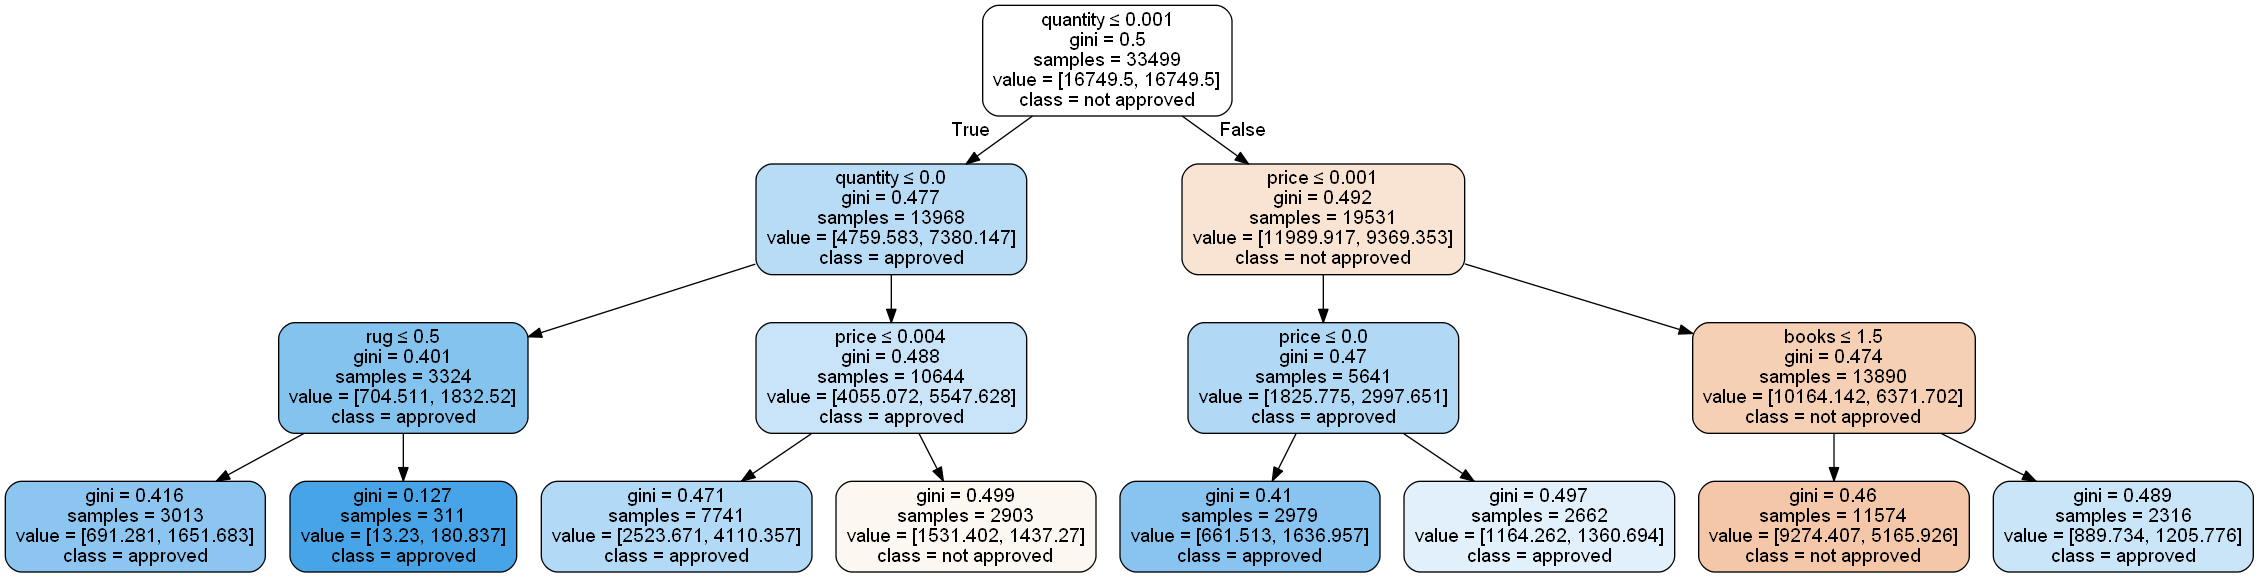

In [283]:
Image(graph.create_png())

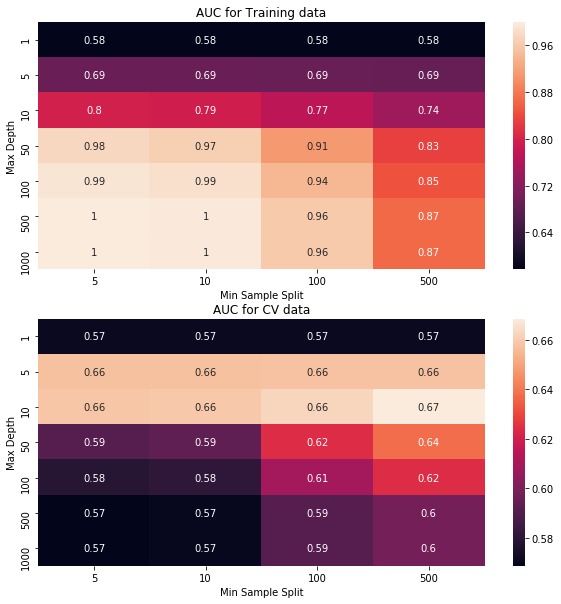

In [284]:
# Plot seaborn heatmap for gridsearchcv: https://www.kaggle.com/arindambanerjee/grid-search-simplified
max_depth_list = list(clf.cv_results_['param_max_depth'].data)
samplesplit_list = list(clf.cv_results_['param_min_samples_split'].data)

plt.figure(1, figsize=(10,10))
plt.subplot(211)
data = pd.DataFrame(data={'Max Depth':max_depth_list, \
                          'Min Sample Split':samplesplit_list , \
                          'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Max Depth', columns='Min Sample Split', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for Training data')

plt.subplot(212)
data = pd.DataFrame(data={'Max Depth':max_depth_list, \
                          'Min Sample Split':samplesplit_list , \
                          'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Max Depth', columns='Min Sample Split', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for CV data')

plt.show()

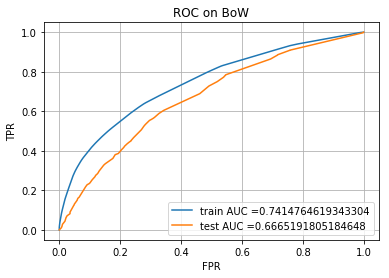

In [285]:
lr = DecisionTreeClassifier(max_depth=best_d, class_weight='balanced', min_samples_split=best_split, random_state=1)
lr.fit(tr_X, tr_y)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(tr_X)[:,1]
y_test_pred = lr.predict_proba(ts_X)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(tr_y, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(ts_y, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC on BoW")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4607280094203376 for threshold 0.475
Train confusion matrix
Test confusion matrix


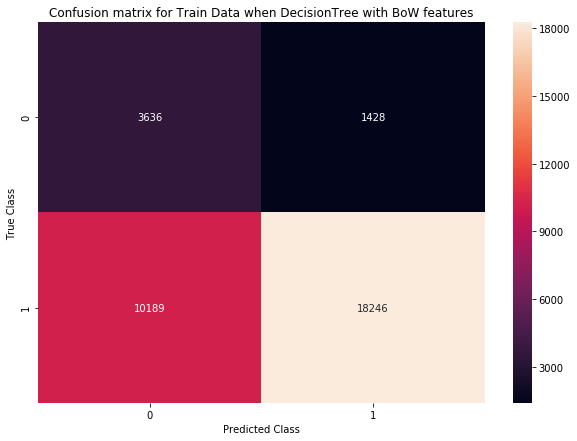

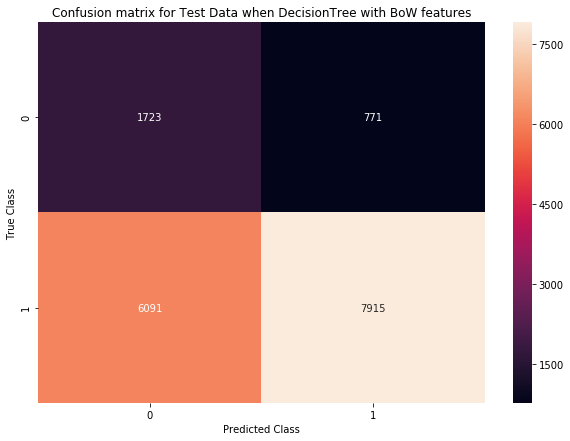

In [286]:
plot_cm('BoW', tr_thresholds, train_fpr, train_tpr, tr_y, y_train_pred, ts_y, y_test_pred)

In [287]:
# Predict test data wih best thresold value
ts_predict = predict_with_best_t(lr.predict_proba(ts_X)[:,1], 0.475)

false_datapoints = []

# Iterate over all data points in test data
for i in range(ts_X.shape[0]):
    # Select that data point where test true value is 0 and test predicted value is 1
    if (ts_y[i] == 0) and (ts_predict[i] == 1):
        # If it true, then put that datapoint into another array
        false_datapoints.append(ts_text.iloc[i].values)

In [288]:
false_datapoints = pd.DataFrame(data=false_datapoints, columns=ts_text.columns)
false_datapoints.shape

(771, 10)

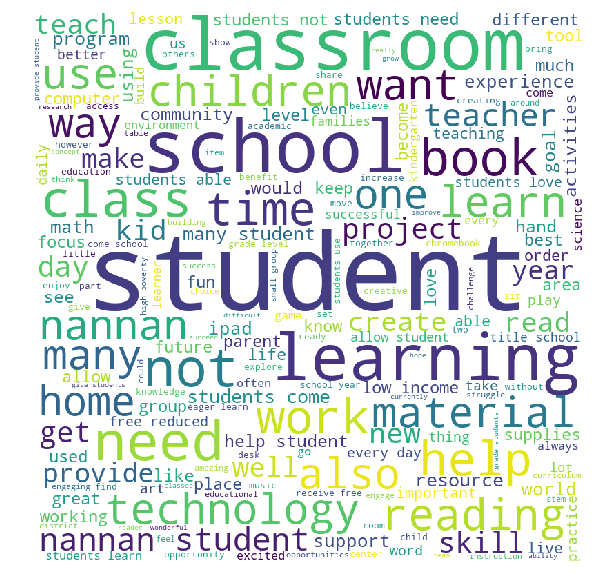

In [289]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# WordCloud on Essay
from wordcloud import WordCloud

comment_words = ' '
for val in false_datapoints['clean_essay']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

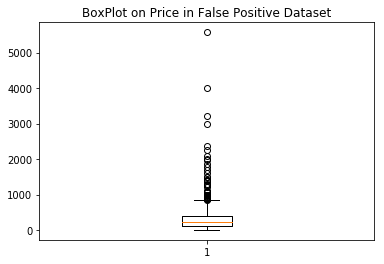

In [290]:
# BoxPlot on test price
plt.boxplot(false_datapoints['price'])
plt.title('BoxPlot on Price in False Positive Dataset')
plt.show()

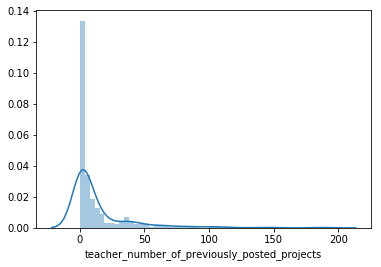

In [291]:
# PDF on teacher_number_of_previously_posted_projects
sns.distplot(false_datapoints['teacher_number_of_previously_posted_projects'], hist=True, kde=True)

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [74]:
# Please write all the code with proper documentation

In [157]:
clf = GridSearchCV(clf, parameters, cv=3, scoring='roc_auc', verbose=3)
clf.fit(tr_X, tr_y)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5661502566606066, total=   3.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5616270486654009, total=   3.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5659347823809485, total=   3.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5661502566606066, total=   3.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5616270486654009, total=   3.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5659347823809485, total=   3.1s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=0.5661502566606066, total=   3.1s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=0.5616270486654009, total=   3.2s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed: 34.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

# Best Params for TFIDF Feature

In [158]:
best_d = clf.best_params_['max_depth']
best_split = clf.best_params_['min_samples_split']
best_d, best_split

(10, 500)

# Graphviz for TFIDF feature

In [159]:
# Taking max_depth=2 as per task
lr = DecisionTreeClassifier(max_depth=3, class_weight='balanced', min_samples_split=best_split)
lr.fit(tr_X,tr_y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [160]:
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(lr, out_file=dot_data, \
                     filled=True, rounded=True, special_characters=True, \
                     feature_names=list_features, class_names=['not approved','approved'])

In [161]:
import pydotplus
from IPython.display import Image  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

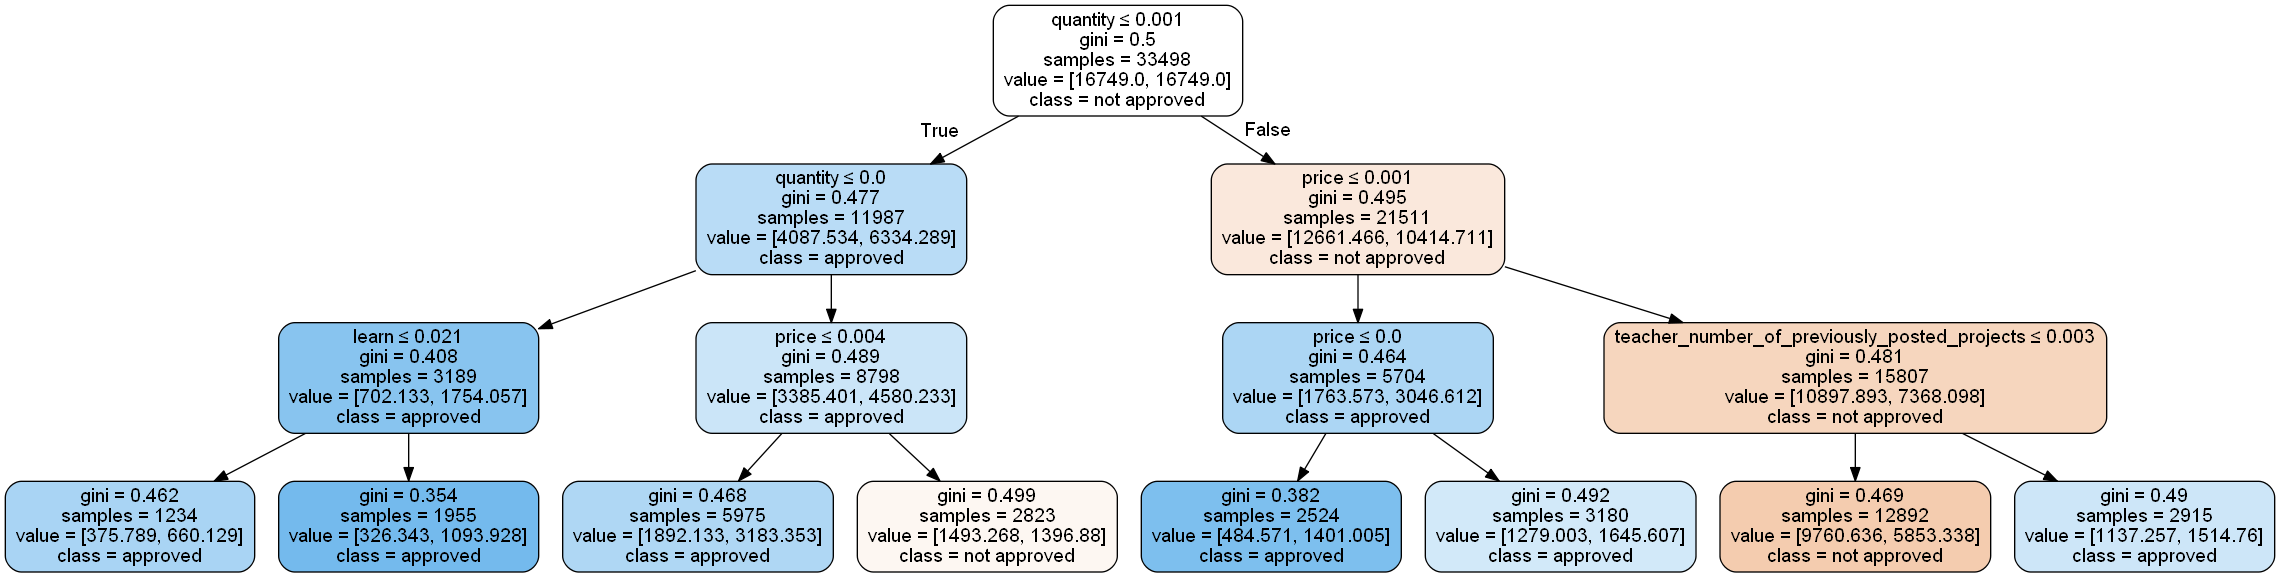

In [162]:
Image(graph.create_png())

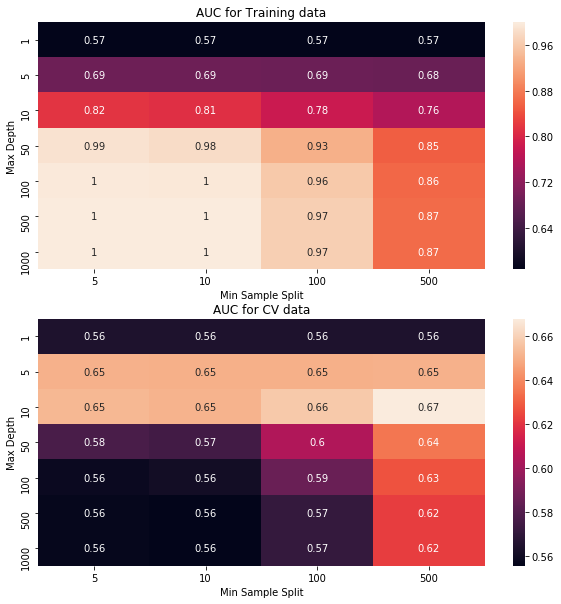

In [163]:
# Plot seaborn heatmap for gridsearchcv: https://www.kaggle.com/arindambanerjee/grid-search-simplified
max_depth_list = list(clf.cv_results_['param_max_depth'].data)
samplesplit_list = list(clf.cv_results_['param_min_samples_split'].data)

plt.figure(1, figsize=(10,10))
plt.subplot(211)
data = pd.DataFrame(data={'Max Depth':max_depth_list, \
                          'Min Sample Split':samplesplit_list , \
                          'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Max Depth', columns='Min Sample Split', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for Training data')

plt.subplot(212)
data = pd.DataFrame(data={'Max Depth':max_depth_list, \
                          'Min Sample Split':samplesplit_list , \
                          'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Max Depth', columns='Min Sample Split', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for CV data')

plt.show()

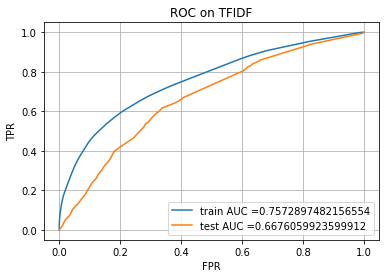

In [164]:
lr = DecisionTreeClassifier(max_depth=best_d, class_weight='balanced', min_samples_split=best_split, random_state=1)
lr.fit(tr_X, tr_y)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(tr_X)[:,1]
y_test_pred = lr.predict_proba(ts_X)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(tr_y, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(ts_y, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC on TFIDF")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4800559680059899 for threshold 0.469
Train confusion matrix
Test confusion matrix


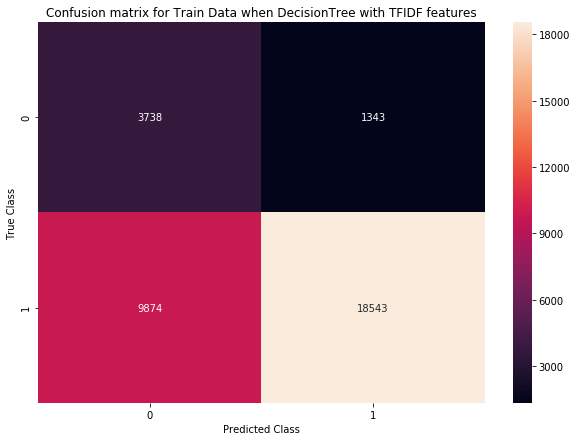

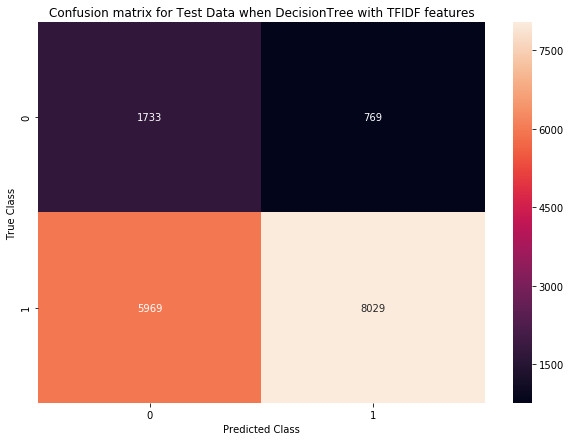

In [165]:
plot_cm('TFIDF', tr_thresholds, train_fpr, train_tpr, tr_y, y_train_pred, ts_y, y_test_pred)

In [166]:
# Predict test data wih best thresold value
ts_predict = predict_with_best_t(lr.predict_proba(ts_X)[:,1], 0.469)

false_datapoints = []

# Iterate over all data points in test data
for i in range(ts_X.shape[0]):
    # Select that data point where test true value is 0 and test predicted value is 1
    if (ts_y[i] == 0) and (ts_predict[i] == 1):
        # If it true, then put that datapoint into another array
        false_datapoints.append(ts_text.iloc[i].values)

In [167]:
false_datapoints = pd.DataFrame(data=false_datapoints, columns=ts_text.columns)
false_datapoints.shape

(769, 10)

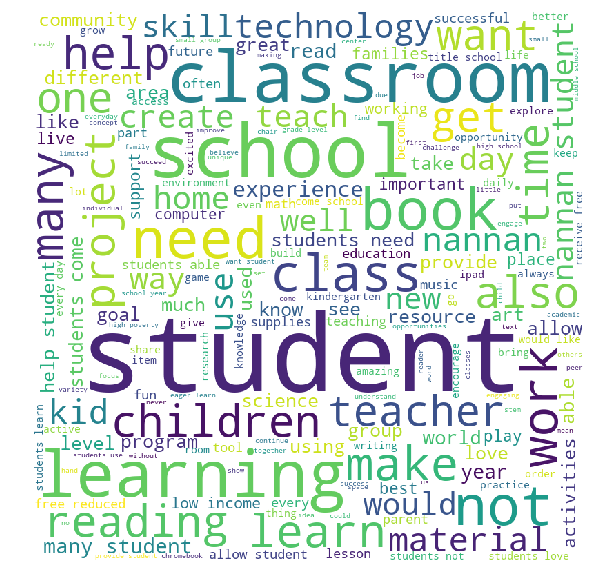

In [168]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# WordCloud on Essay
from wordcloud import WordCloud

comment_words = ' '
for val in false_datapoints['clean_essay']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

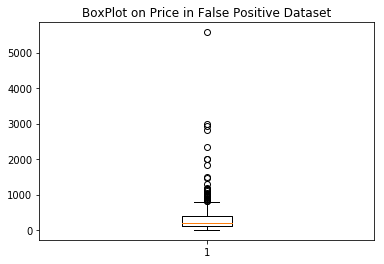

In [169]:
# BoxPlot on test price
plt.boxplot(false_datapoints['price'])
plt.title('BoxPlot on Price in False Positive Dataset')
plt.show()

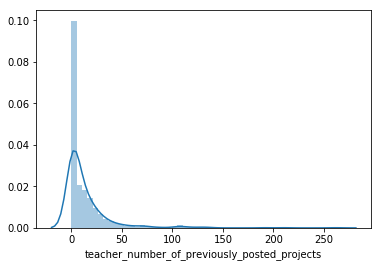

In [170]:
# PDF on teacher_number_of_previously_posted_projects
sns.distplot(false_datapoints['teacher_number_of_previously_posted_projects'], hist=True, kde=True)

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation

In [74]:
clf = GridSearchCV(clf, parameters, cv=3, scoring='roc_auc', verbose=3)
clf.fit(tr_X, tr_y)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5661502566606066, total=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5616270486654009, total=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5659347823809485, total=   1.5s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5661502566606066, total=   1.5s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5616270486654009, total=   1.5s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5659347823809485, total=   1.5s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=0.5661502566606066, total=   1.5s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=0.5616270486654009, total=   1.5s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed: 17.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

# Best Params for AVGW2V Feature

In [75]:
best_d = clf.best_params_['max_depth']
best_split = clf.best_params_['min_samples_split']
best_d, best_split

(5, 500)

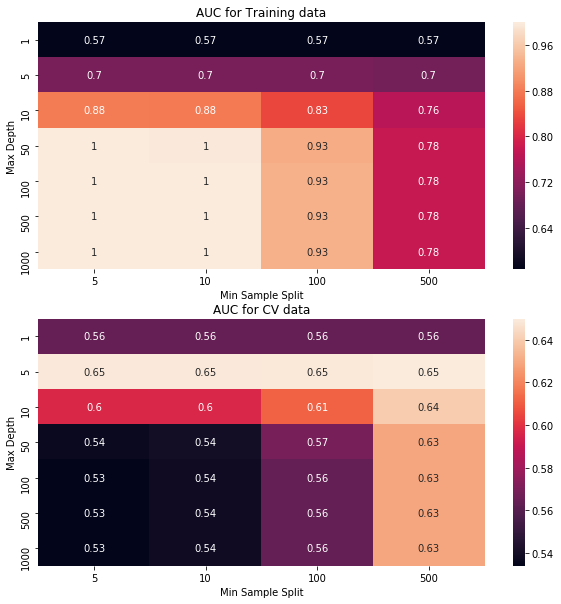

In [76]:
# Plot seaborn heatmap for gridsearchcv: https://www.kaggle.com/arindambanerjee/grid-search-simplified
max_depth_list = list(clf.cv_results_['param_max_depth'].data)
samplesplit_list = list(clf.cv_results_['param_min_samples_split'].data)

plt.figure(1, figsize=(10,10))
plt.subplot(211)
data = pd.DataFrame(data={'Max Depth':max_depth_list, \
                          'Min Sample Split':samplesplit_list , \
                          'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Max Depth', columns='Min Sample Split', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for Training data')

plt.subplot(212)
data = pd.DataFrame(data={'Max Depth':max_depth_list, \
                          'Min Sample Split':samplesplit_list , \
                          'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Max Depth', columns='Min Sample Split', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for CV data')

plt.show()

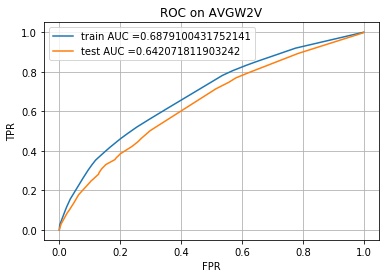

In [77]:
lr = DecisionTreeClassifier(max_depth=best_d, class_weight='balanced', min_samples_split=best_split, random_state=1)
lr.fit(tr_X, tr_y)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(tr_X)[:,1]
y_test_pred = lr.predict_proba(ts_X)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(tr_y, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(ts_y, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC on AVGW2V")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.39660680977732465 for threshold 0.482
Train confusion matrix
Test confusion matrix


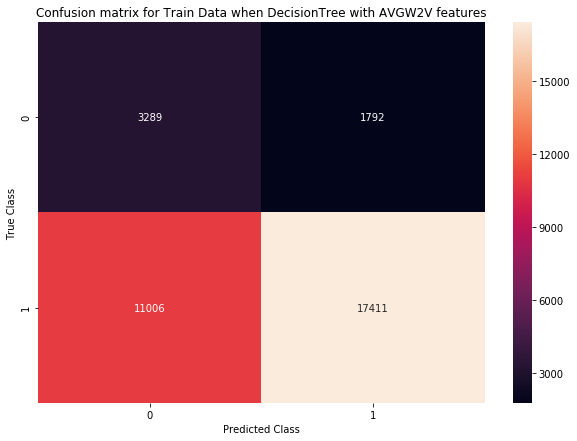

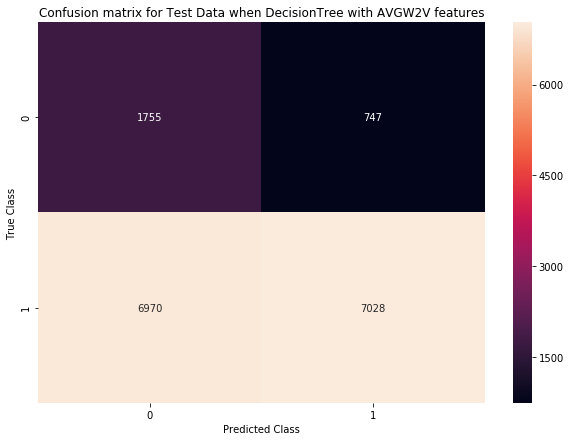

In [78]:
plot_cm('AVGW2V', tr_thresholds, train_fpr, train_tpr, tr_y, y_train_pred, ts_y, y_test_pred)

In [80]:
# Predict test data wih best thresold value
ts_predict = predict_with_best_t(y_test_pred, 0.482)

false_datapoints = []

# Iterate over all data points in test data
for i in range(ts_X.shape[0]):
    # Select that data point where test true value is 0 and test predicted value is 1
    if (ts_y[i] == 0) and (ts_predict[i] == 1):
        # If it true, then put that datapoint into another array
        false_datapoints.append(ts_text.iloc[i].values)

In [81]:
false_datapoints = pd.DataFrame(data=false_datapoints, columns=ts_text.columns)
false_datapoints.shape

(747, 10)

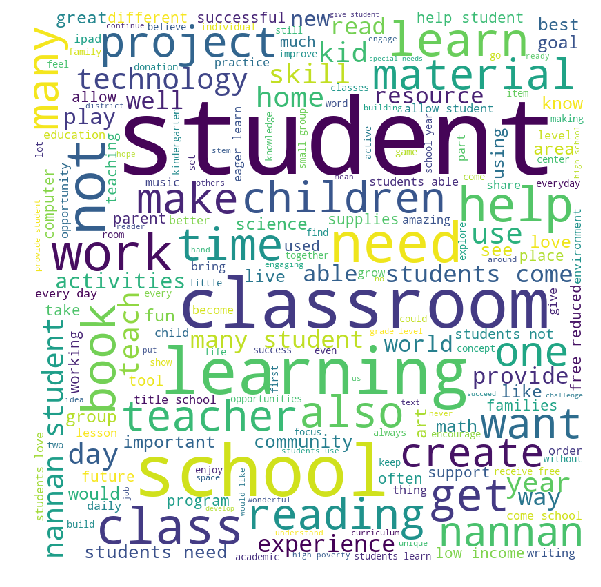

In [82]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# WordCloud on Essay
from wordcloud import WordCloud

comment_words = ' '
for val in false_datapoints['clean_essay']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

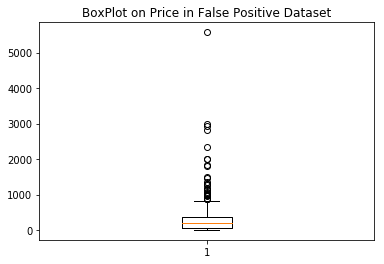

In [83]:
# BoxPlot on test price
plt.boxplot(false_datapoints['price'])
plt.title('BoxPlot on Price in False Positive Dataset')
plt.show()

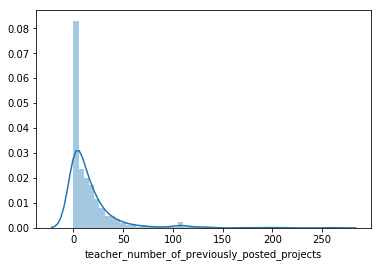

In [84]:
# PDF on teacher_number_of_previously_posted_projects
sns.distplot(false_datapoints['teacher_number_of_previously_posted_projects'], hist=True, kde=True)

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation

In [115]:
clf = GridSearchCV(clf, parameters, cv=3, scoring='roc_auc', verbose=3)
clf.fit(tr_X, tr_y)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5661502566606066, total=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5616270486654009, total=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=0.5659347823809485, total=   1.5s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5661502566606066, total=   1.5s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5616270486654009, total=   1.5s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.5659347823809485, total=   1.5s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=0.5661502566606066, total=   1.5s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=0.5616270486654009, total=   1.5s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed: 15.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

# Best Params for TFIDFW2V Feature

In [116]:
best_d = clf.best_params_['max_depth']
best_split = clf.best_params_['min_samples_split']
best_d, best_split

(5, 500)

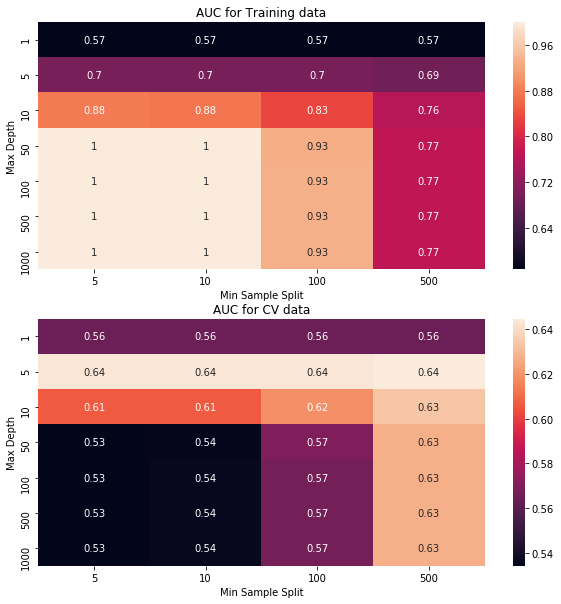

In [117]:
# Plot seaborn heatmap for gridsearchcv: https://www.kaggle.com/arindambanerjee/grid-search-simplified
max_depth_list = list(clf.cv_results_['param_max_depth'].data)
samplesplit_list = list(clf.cv_results_['param_min_samples_split'].data)

plt.figure(1, figsize=(10,10))
plt.subplot(211)
data = pd.DataFrame(data={'Max Depth':max_depth_list, \
                          'Min Sample Split':samplesplit_list , \
                          'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Max Depth', columns='Min Sample Split', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for Training data')

plt.subplot(212)
data = pd.DataFrame(data={'Max Depth':max_depth_list, \
                          'Min Sample Split':samplesplit_list , \
                          'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Max Depth', columns='Min Sample Split', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for CV data')

plt.show()

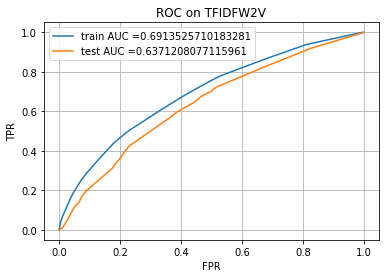

In [118]:
lr = DecisionTreeClassifier(max_depth=best_d, class_weight='balanced', min_samples_split=best_split, random_state=1)
lr.fit(tr_X, tr_y)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(tr_X)[:,1]
y_test_pred = lr.predict_proba(ts_X)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(tr_y, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(ts_y, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC on TFIDFW2V")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4047765814455433 for threshold 0.5
Train confusion matrix
Test confusion matrix


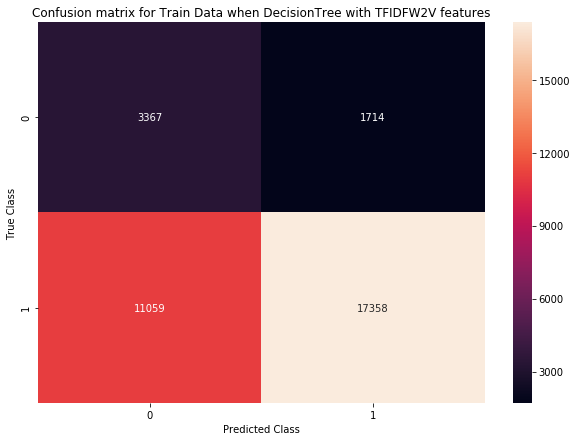

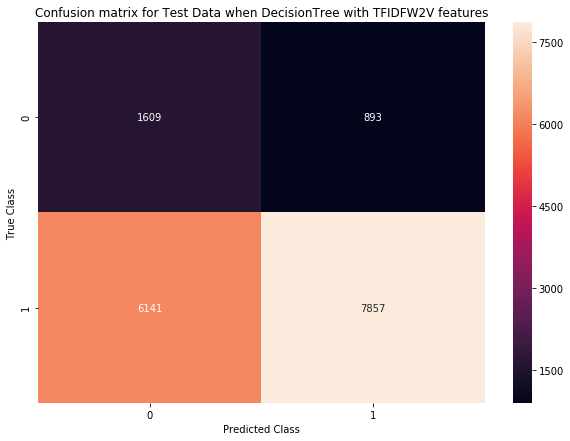

In [119]:
plot_cm('TFIDFW2V', tr_thresholds, train_fpr, train_tpr, tr_y, y_train_pred, ts_y, y_test_pred)

In [121]:
# Predict test data wih best thresold value
ts_predict = predict_with_best_t(lr.predict_proba(ts_X)[:,1], 0.5)

false_datapoints = []

# Iterate over all data points in test data
for i in range(ts_X.shape[0]):
    # Select that data point where test true value is 0 and test predicted value is 1
    if (ts_y[i] == 0) and (ts_predict[i] == 1):
        # If it true, then put that datapoint into another array
        false_datapoints.append(ts_text.iloc[i].values)

In [122]:
false_datapoints = pd.DataFrame(data=false_datapoints, columns=ts_text.columns)
false_datapoints.shape

(893, 10)

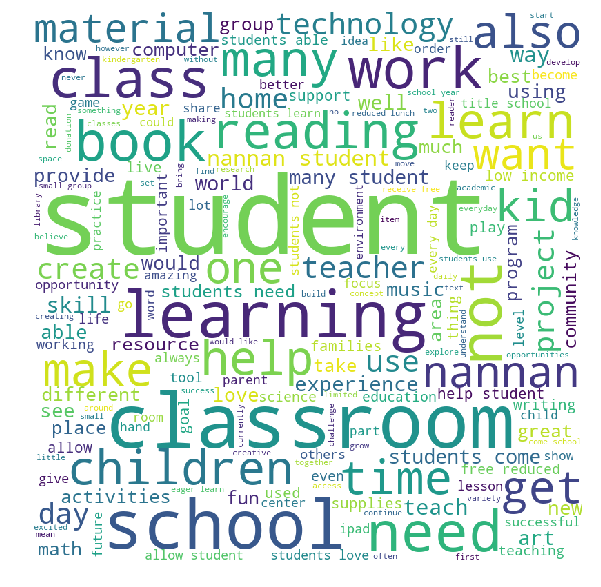

In [123]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# WordCloud on Essay
from wordcloud import WordCloud

comment_words = ' '
for val in false_datapoints['clean_essay']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

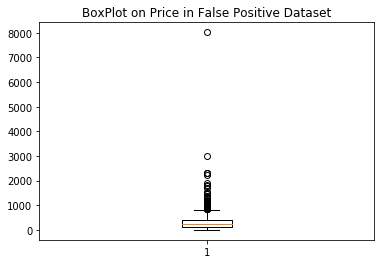

In [124]:
# BoxPlot on test price
plt.boxplot(false_datapoints['price'])
plt.title('BoxPlot on Price in False Positive Dataset')
plt.show()

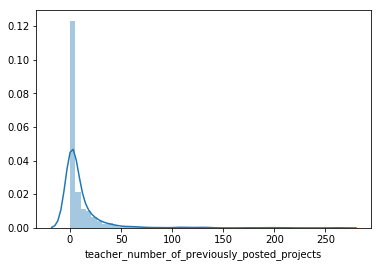

In [125]:
# PDF on teacher_number_of_previously_posted_projects
sns.distplot(false_datapoints['teacher_number_of_previously_posted_projects'], hist=True, kde=True)

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [324]:
# Before proceed here, get compile and run again in [SET 2] on TFIDF Feature

In [171]:
# taking top 5k feature importance
feature_imp5k = np.flip(np.argsort(lr.feature_importances_))[:5000]

In [172]:
# Dimension of this variable
feature_imp5k.shape

(5000,)

In [173]:
# print the feature importance column number
feature_imp5k

array([   1,    0,    2, ..., 3857, 3858, 3859], dtype=int64)

In [174]:
tr_5k = tr_X[:,feature_imp5k]
ts_5k = ts_X[:,feature_imp5k]

In [175]:
tr_5k.shape, ts_5k.shape

((33498, 5000), (16500, 5000))

In [177]:
# Training the Logistic Regression Model for 5k feature importance
from sklearn.linear_model import LogisticRegression

In [178]:
clf = LogisticRegression(class_weight='balanced', random_state=1)
parameters = {'C':[10**-4,10**-3,10**-2,10**-1,1,10,100,10**3,10**4],
             'penalty':['l1','l2']}

In [179]:
clf = GridSearchCV(clf, parameters, cv=3, scoring='roc_auc', verbose=3)
clf.fit(tr_5k, tr_y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=0.5, total=   5.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=0.5, total=   4.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.5s remaining:    0.0s


[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=0.5, total=   4.8s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.5450458776082798, total=   4.8s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.5579748251978365, total=   4.9s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.5698773566833224, total=   4.8s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=0.5, total=   4.8s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=0.5, total=   4.7s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=0.5, total=   4.8s
[CV] C

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  8.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

In [180]:
best_C = clf.best_params_['C']
best_penalty = clf.best_params_['penalty']
best_C, best_penalty

(1, 'l1')

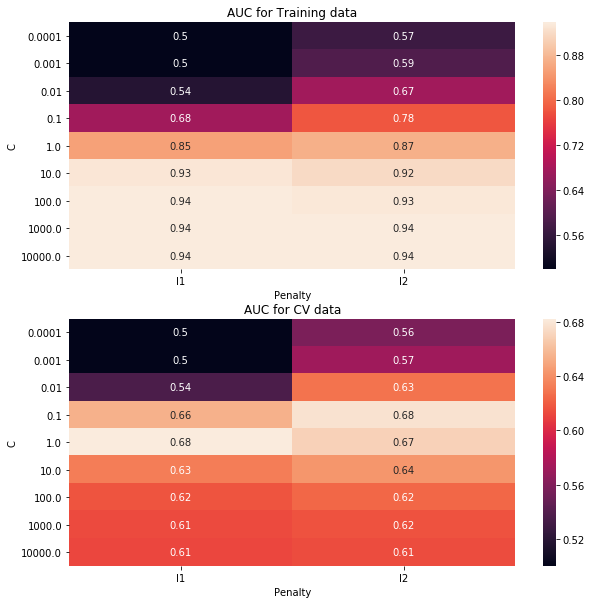

In [181]:
# Plot seaborn heatmap for gridsearchcv: https://www.kaggle.com/arindambanerjee/grid-search-simplified
C_list = list(clf.cv_results_['param_C'].data)
penalty_list = list(clf.cv_results_['param_penalty'].data)

plt.figure(1, figsize=(10,10))
plt.subplot(211)
data = pd.DataFrame(data={'C':C_list, \
                          'Penalty':penalty_list , \
                          'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='C', columns='Penalty', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for Training data')

plt.subplot(212)
data = pd.DataFrame(data={'C':C_list, \
                          'Penalty':penalty_list , \
                          'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='C', columns='Penalty', values='AUC')
sns.heatmap(data, annot=True).set_title('AUC for CV data')

plt.show()

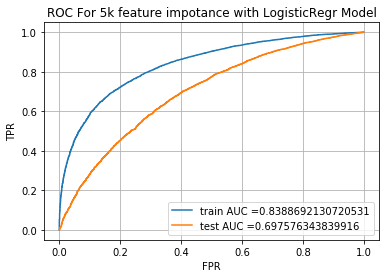

In [182]:
lr = LogisticRegression(C=best_C, class_weight='balanced', penalty=best_penalty, random_state=1)
lr.fit(tr_5k, tr_y)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# Since LinearSVC doesnt have predict_proba attribute: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
y_train_pred = lr.predict_proba(tr_5k)[:,1]
y_test_pred = lr.predict_proba(ts_5k)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(tr_y, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(ts_y, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC For 5k feature impotance with LogisticRegr Model")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.5790669044437498 for threshold 0.498
Train confusion matrix


Text(0.5, 1.0, 'Confusion matrix for Train Data when LogisticRegr with 5K Feature Imp features')

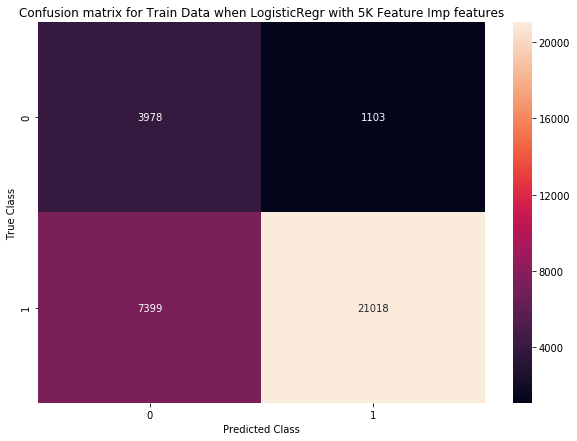

In [191]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
cm = metrics.confusion_matrix(tr_y, predict_with_best_t(y_train_pred, best_t))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion matrix for Train Data when LogisticRegr with 5K Feature Imp features')

Text(0.5, 1.0, 'Confusion matrix for Test Data when LogisticRegr with 5K Feature Imp features')

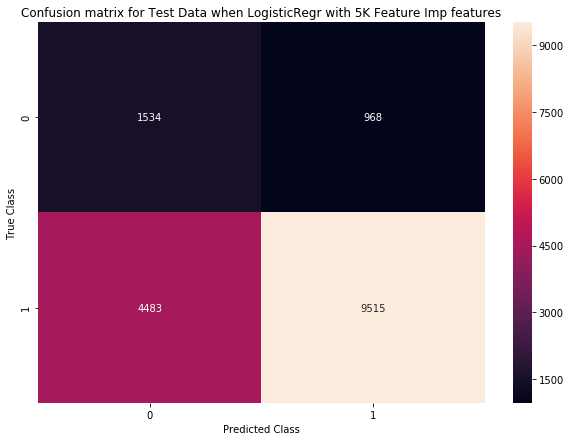

In [192]:
cm = metrics.confusion_matrix(ts_y, predict_with_best_t(y_test_pred, 0.498))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion matrix for Test Data when LogisticRegr with 5K Feature Imp features')

In [184]:
# Predict test data wih best thresold value
ts_predict = predict_with_best_t(lr.predict_proba(ts_5k)[:,1], 0.498)

false_datapoints = []

# Iterate over all data points in test data
for i in range(ts_5k.shape[0]):
    # Select that data point where test true value is 0 and test predicted value is 1
    if (ts_y[i] == 0) and (ts_predict[i] == 1):
        # If it true, then put that datapoint into another array
        false_datapoints.append(ts_text.iloc[i].values)

In [185]:
false_datapoints = pd.DataFrame(data=false_datapoints, columns=ts_text.columns)
false_datapoints.shape

(968, 10)

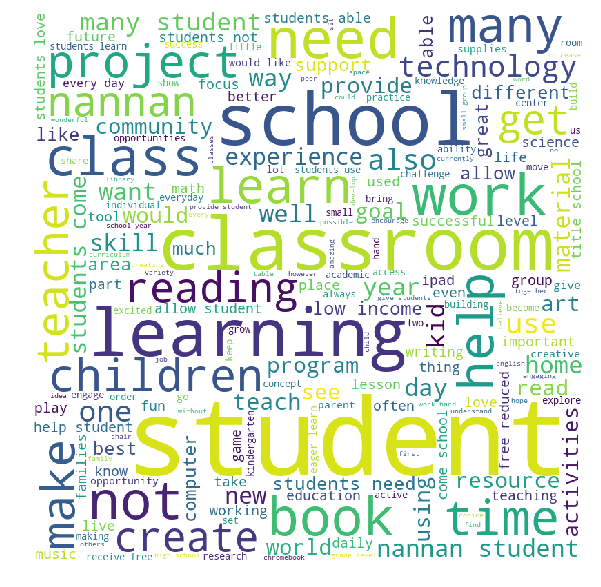

In [193]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# WordCloud on Essay
from wordcloud import WordCloud

comment_words = ' '
for val in false_datapoints['clean_essay']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

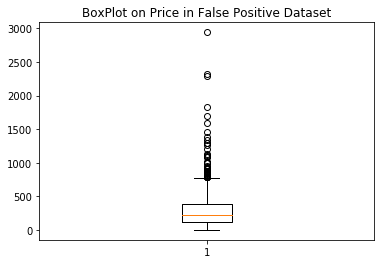

In [194]:
# BoxPlot on test price
plt.boxplot(false_datapoints['price'])
plt.title('BoxPlot on Price in False Positive Dataset')
plt.show()

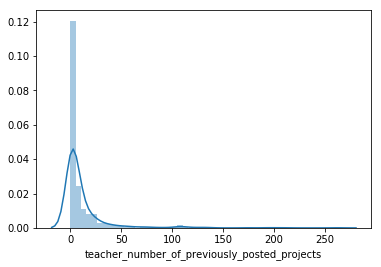

In [195]:
# PDF on teacher_number_of_previously_posted_projects
sns.distplot(false_datapoints['teacher_number_of_previously_posted_projects'], hist=True, kde=True)

<h1>3. Conclusion</h1>

In [196]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Features", "Model", "max_depth", "min_sample_split", "Maximum AUC score",]

x.add_row(["BoW","DT", 10, 500,0.66651])
x.add_row(["TFIDF","DT", 10, 500, 0.6676])
x.add_row(["AVG W2V","DT", 5, 500, 0.64207])
x.add_row(["TFIDF W2V","DT", 5,500, 0.63712])
print(x)

y = PrettyTable()

y.field_names = ["Features", "Model", "C", "penalty", "Maximum AUC score",]
y.add_row(["5k Feature Importance from DT","LogisticRegr", 1,"l1", 0.69757])
print(y)

+-----------+-------+-----------+------------------+-------------------+
|  Features | Model | max_depth | min_sample_split | Maximum AUC score |
+-----------+-------+-----------+------------------+-------------------+
|    BoW    |   DT  |     10    |       500        |      0.66651      |
|   TFIDF   |   DT  |     10    |       500        |       0.6676      |
|  AVG W2V  |   DT  |     5     |       500        |      0.64207      |
| TFIDF W2V |   DT  |     5     |       500        |      0.63712      |
+-----------+-------+-----------+------------------+-------------------+
+-------------------------------+--------------+---+---------+-------------------+
|            Features           |    Model     | C | penalty | Maximum AUC score |
+-------------------------------+--------------+---+---------+-------------------+
| 5k Feature Importance from DT | LogisticRegr | 1 |    l1   |      0.69757      |
+-------------------------------+--------------+---+---------+-------------------+
